In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [5]:
cancerBreast = datasets.load_breast_cancer()
X = cancerBreast.data
y = cancerBreast.target


In [7]:
X = cancerBreast.data[:,:2]


array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [8]:
svc = svm.SVC(kernel='poly', degree=3, C=1, gamma='auto', random_state=None)
svc.fit(X,y)

SVC(C=1, gamma='auto', kernel='poly')

In [9]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

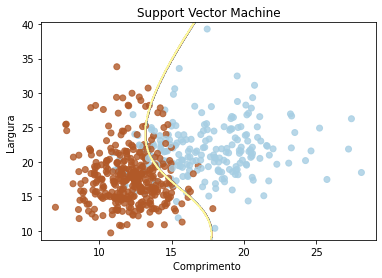

In [11]:
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel("Comprimento ")
plt.ylabel("Largura ")
plt.xlim(xx.min(), xx.max())
plt.title("Support Vector Machine")
plt.show()

In [12]:
# importanto bibliotecas complementares
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
# Separando conjutno de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(cancerBreast.data, 
                                                    cancerBreast.target, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [15]:
# Ajustando o Modelo de SVM

# Configurando o Modelo
clf = svm.SVC(kernel='linear', random_state=None, probability=True)

# Ajustando o Modelo
clf.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
y_pred = clf.predict(X_test)

In [16]:
# Avaliar o modelo
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average=None))
print("Recall:", metrics.recall_score(y_test, y_pred, average=None))


Accuracy: 0.9590643274853801
Precision: [0.92424242 0.98095238]
Recall: [0.96825397 0.9537037 ]
